In [170]:
import os,sys
#set the path to the Sandbox repository
sys.path.append('../../../')
#import the sandbox
import sandbox as sb
# set the path to the calibration file
CALIBRATION_FILE = '../../calibration_files/my_calibration.json'

In [171]:
calib = sb.CalibrationData(file = CALIBRATION_FILE)
sensor = sb.KinectV2(calib)
projector = sb.Projector(calib)

JSON configuration loaded.
KinectV2 initialized.


Launching server at http://localhost:64271
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [172]:
aruco = sb.ArucoMarkers(sensor, calib)

In [173]:
module = sb.PrototypingModule(calib,sensor,projector, aruco)

In [174]:
module.setup()

In [175]:
module.update()

In [176]:
module.run()

Thread started or resumed...


In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal 
#import time 

In [ ]:
s_frame=module.crop_frame(sensor.get_filtered_frame())

In [ ]:
np.save("frame.npy", s_frame)

In [ ]:
s_frame = np.load("frame.npy")

In [ ]:
plt.pcolormesh(s_frame)
plt.colorbar()

In [177]:
def s_topo(s_frame):
    #a_topo = s_frame[20:200, 20:250]
    #s_frame = np.load("frame.npy")
    a_topo = s_frame
    aa_topo = 1.0/np.sum(a_topo) * a_topo
    
    #plt.imshow(aa_topo, origin = 'lower')
    #plt.plot(50,160,'ro')
    #plt.colorbar()
    return aa_topo
    

In [178]:
def mcmc (n, m, frame, xy, ax_sandbox):
    ymax,  xmax = frame.shape
    z=frame
    x , y = int(xy[0]), int(xy[1])
    ax = []
    ay = []
    #ax_sample =[]
    #ay_sample =[]
    crop = 20
    step =180
    
    for t in range(0,m+n):
        x_1,y_1 = np.random.multivariate_normal(mean=[x,y], cov=[[step,0],[0,step]])
        if crop< x_1 < xmax-crop and crop < y_1 < ymax-crop:
            x_sample = int(x_1) 
            y_sample = int(y_1)
            accept_prob = min(1, z[y_sample][x_sample]/z[y][x] * 1.0)
            #print('accept_prob:',accept_prob)
            u = random.uniform(0, 1)
            #print('u:',u)
            #ax_sample.append(x_sample)
            #ay_sample.append(y_sample)

            if u < accept_prob: # 
                x = x_sample
                y = y_sample
                #ax_sandbox.plot(x, y,'r*' )
                #print(x,y)
                #time.sleep(1)
                #print('x:,y:',x,y)

            if t >= m:
                ax.append(x)
                ay.append(y)
                #ax_sandbox.plot(x, y,'r*' )
                #time.sleep(1)
    
    return ax, ay
            

In [179]:
def plot_from_notebook(sandbox_ax, sandbox_frame, xy):
    frame = sandbox_frame
    ax = sandbox_ax
    frame = calib.s_max - frame
    
    #s_frame = calib.s_max - s_frame
   # s_frame = s_topo(frame)
    ax.pcolormesh(frame, cmap ="gist_earth")#, vmin = calib.s_min, vmax = calib.s_max)
    #print(frame.max())
    levels=np.arange(0,frame.max(), 50)
    ax.contour(frame, levels=levels, colors = 'black' )
    
    #xy = (50,50)
    
    #x_list, y_list = mcmc(n=1000, m=100, frame=frame, xy=xy, ax_sandbox=ax)
    #for i in range(len(x_list)):
    #    ax.plot(x_list[i], y_list[i], "r*")
    #    time.sleep(1)
    #print("is outside")
    
    #return True
    
    
    if xy is not None:
        ax.plot(xy[0],xy[1],'r*')
        
        new_frame = s_topo(frame)
        x_list, y_list = mcmc(n=4000, m=100, frame=new_frame, xy=xy, ax_sandbox =ax)
        
        ax.plot(x_list, y_list,'r.' )


In [180]:
module.function_to_run = module.plot_sandbox(plot_from_notebook)

In [181]:
module.active_connection=True

In [ ]:
module.active_connection=False

In [53]:
module.stop()

thread was not running.


In [54]:
module.run()

Thread started or resumed...


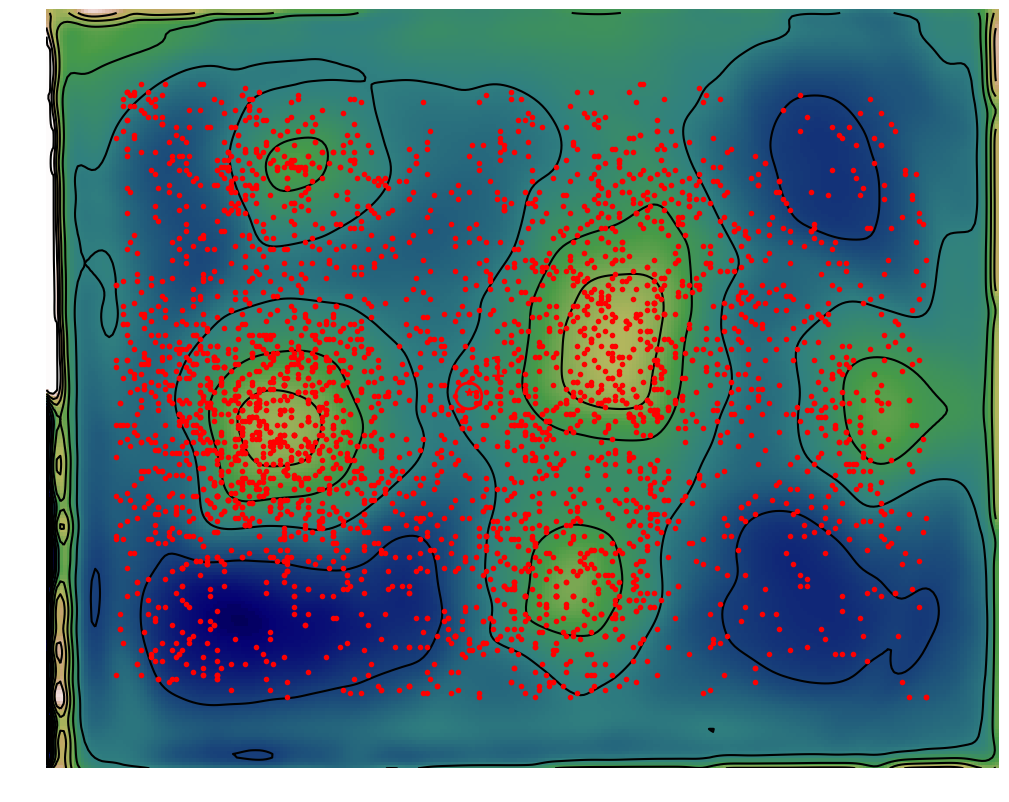

In [189]:
module.plot.figure

In [68]:
plot_workaround()

TypeError: s_topo() missing 1 required positional argument: 's_frame'

In [74]:
def plot_workaround():
    axes = module.plot.ax
    axes.cla()
    frame = s_topo()
    xy = (50,50)
    x_list, y_list = mcmc(n=10000, m=100, frame=frame, xy=xy, ax_sandbox=axes)
    
    for i in range(len(x_list)):
        axes.plot(x_list[i], y_list[i], "r.")
    #ax.plot(x_list, y_list, "r*")
        module.projector.show(module.plot.figure)
        module.projector.trigger()
        #plt.pause(1)

In [ ]:
module.plot.ax

In [ ]:
x_list

In [ ]:
ax = module.plot.ax
ax.cla()
frame = s_topo()
xy = (50,50)
x_list, y_list = mcmc(n=1000, m=100, frame=frame, xy=xy, ax_sandbox=ax)
module.projector.show(module.plot.figure)
module.projector.trigger()

In [ ]:
for i in range(len(x_list)):
    #print(i)
    ax.plot(x_list[i], y_list[i], "r*")
#ax.plot(x_list, y_list, "r*")
    module.projector.show(module.plot.figure)
    module.projector.trigger()
    plt.pause(0.001)

In [ ]:
range(len(x_list))

In [ ]:
module.plot.ax